In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!bash /kaggle/input/mast-shell-file/MAST_2025-10-24T0538.sh

<<< Downloading File: mast:JWST/product/jw02739_20250910t075301_pool.csv
                  To: MAST_2025-10-24T0538/JWST/jw02739013001_02105_00003_nrca2/jw02739_20250910t075301_pool.csv
######################################################################### 100.0%
<<< Downloading File: mast:JWST/product/jw02739-o001_20250910t075301_image3_00004_asn.json
                  To: MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_20250910t075301_image3_00004_asn.json
######################################################################### 100.0%
<<< Downloading File: mast:JWST/product/jw02739-o001_t001_nircam_clear-f090w_cat.ecsv
                  To: MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_cat.ecsv
######################################################################### 100.0%
<<< Downloading File: mast:JWST/product/jw02739-o001_t001_nircam_clear-f090w_i2d.fits
                  To: MAST_2025-10-24T053

In [2]:
!pip install astropy

In [26]:
from astropy.io import fits

In [27]:
hdul=fits.open('/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits')

In [28]:
from astropy.io import fits
from astropy.wcs import WCS

def load_fits_with_wcs(filename, extname_candidates=("SCI", "PRIMARY")):
    """
    Load image data and WCS from a FITS file.
    
    Parameters
    ----------
    filename : str
        Path to the FITS file.
    extname_candidates : tuple
        Ordered list of extension names to try (default: SCI, then PRIMARY).
    
    Returns
    -------
    data : ndarray
        Image data array.
    wcs : astropy.wcs.WCS
        World Coordinate System object.
    header : fits.Header
        Header of the chosen extension.
    """
    with fits.open(filename) as hdul:
        # Try named extensions first
        for ext in extname_candidates:
            if ext in hdul:
                data = hdul[ext].data
                header = hdul[ext].header
                if data is not None:
                    return data, WCS(header), header
        
        # Otherwise, fall back to first image HDU with data
        for hdu in hdul:
            if hasattr(hdu, "data") and hdu.data is not None:
                return hdu.data, WCS(hdu.header), hdu.header
    
    raise ValueError("No valid image HDU with data found in file.")


Set DATE-AVG to '2022-08-19T07:43:48.033' from MJD-AVG.
Set DATE-END to '2022-09-02T22:01:48.902' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.108451 from OBSGEO-[XYZ].
Set OBSGEO-H to 1640894985.534 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


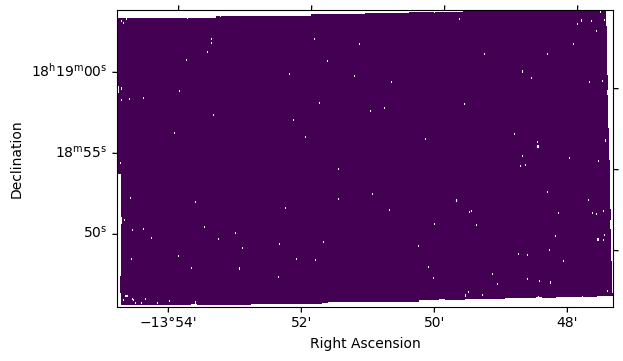

In [29]:
filename = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"
d_, wcs, header = load_fits_with_wcs(filename)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(d_, origin="lower", cmap="viridis")
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
plt.show()


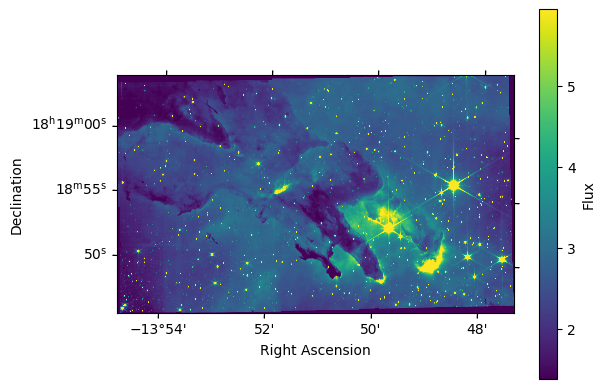

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Replace NaNs with 0 (or use np.nanmin/np.nanmax for scaling)
d_clean = np.nan_to_num(d_, nan=0.0)

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(d_clean, origin="lower", cmap="viridis",
               vmin=np.nanpercentile(d_, 1),  # robust scaling
               vmax=np.nanpercentile(d_, 99))
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
plt.colorbar(im, ax=ax, label="Flux")
plt.show()


Filename: /kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     368   ()      
  1  SCI           1 ImageHDU        75   (14340, 8583)   float32   
  2  ERR           1 ImageHDU        10   (14340, 8583)   float32   
  3  CON           1 ImageHDU        10   (14340, 8583, 5)   int32   
  4  WHT           1 ImageHDU         9   (14340, 8583)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14340, 8583)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14340, 8583)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14340, 8583)   float32   
  8  HDRTAB        1 BinTableHDU    532   160R x 261C   [23A, 5A, 3A, 45A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 30A, 21A, 2A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 20A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 4A, 4A, 5A, D, 

Set DATE-AVG to '2022-08-19T07:43:48.033' from MJD-AVG.
Set DATE-END to '2022-09-02T22:01:48.902' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.108451 from OBSGEO-[XYZ].
Set OBSGEO-H to 1640894985.534 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


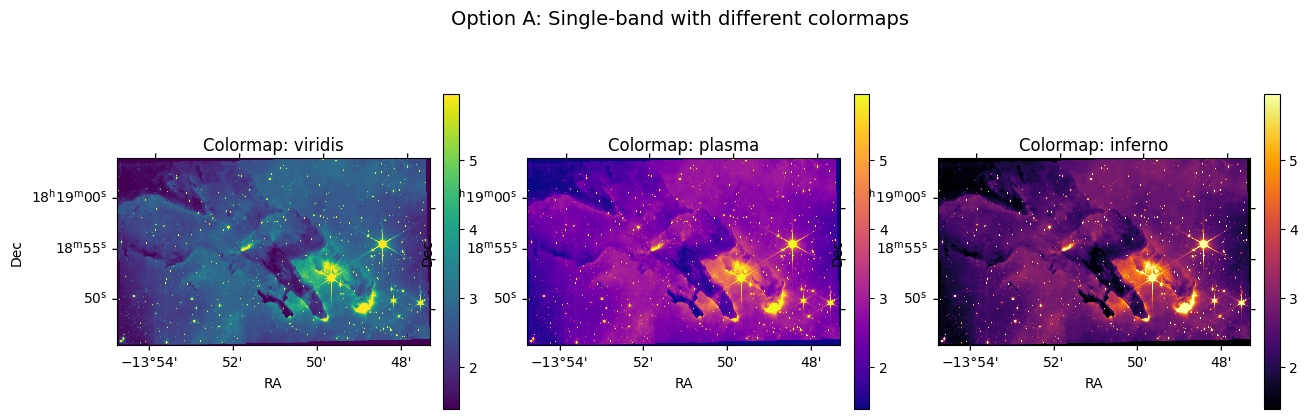

/usr/local/lib/python3.11/dist-packages/astropy/visualization/lupton_rgb.py:452: RuntimeWarning: invalid value encountered in arcsinh
  np.arcsinh(values, out=values)
/usr/local/lib/python3.11/dist-packages/astropy/visualization/lupton_rgb.py:645: RuntimeWarning: invalid value encountered in less_equal
  fInorm = np.where(Int <= 0, 0, np.true_divide(fI, Int))
/usr/local/lib/python3.11/dist-packages/astropy/visualization/basic_rgb.py:153: RuntimeWarning: invalid value encountered in cast
  return image_rgb.astype(output_dtype)


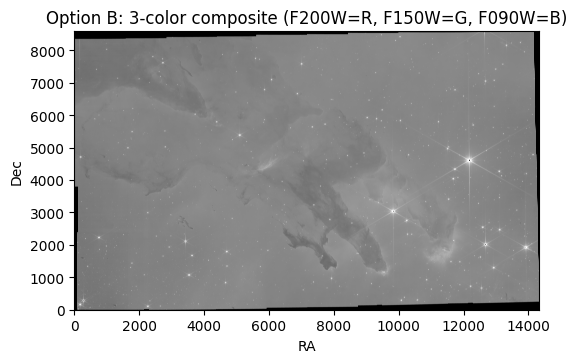

TypeError: Input z must be 2D, not 3D

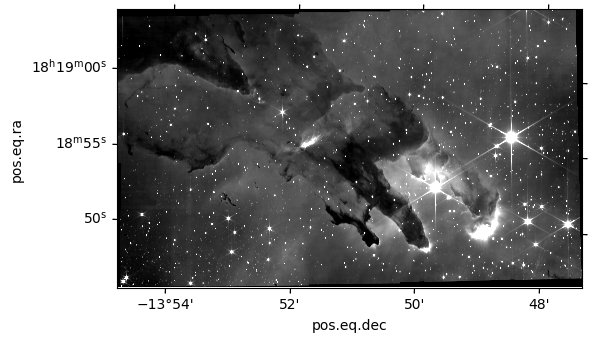

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# -----------------------------
# 1. Load the FITS file safely
# -----------------------------
filename = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"

with fits.open(filename) as hdul:
    hdul.info()  # Print HDU structure for inspection
    # Use the SCI extension (JWST mosaics store science data here)
    d_ = hdul["SCI"].data
    header = hdul["SCI"].header
    wcs = WCS(header)

# Clean up NaNs for plotting
d_clean = np.nan_to_num(d_, nan=0.0)

# -----------------------------
# 2. Option A: Different single colormaps
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': wcs})

cmaps = ["viridis", "plasma", "inferno"]
for ax, cmap in zip(axes, cmaps):
    im = ax.imshow(d_clean, origin="lower", cmap=cmap,
                   vmin=np.nanpercentile(d_, 1),
                   vmax=np.nanpercentile(d_, 99))
    ax.set_title(f"Colormap: {cmap}")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle("Option A: Single-band with different colormaps", fontsize=14)
plt.show()


# -----------------------------
# 3. Option B: Three-color composite (RGB)
# -----------------------------
# Example assumes you have three filters downloaded (replace with your filenames)
f200w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"
f150w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"
f090w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"

# Load each filter's SCI extension
r = fits.getdata(f200w, ext=1)  # Red channel
g = fits.getdata(f150w, ext=1)  # Green channel
b = fits.getdata(f090w, ext=1)  # Blue channel

# Create an RGB composite using Lupton scaling
rgb = make_lupton_rgb(r, g, b, stretch=0.5, Q=10)

plt.figure(figsize=(6, 6))
plt.imshow(rgb, origin="lower")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("Option B: 3-color composite (F200W=R, F150W=G, F090W=B)")
plt.show()


# -----------------------------
# 4. Option C: Overlay masks or contours
# -----------------------------
# Load the DQ (data quality) mask
dq = fits.getdata(filename, ext=3)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(d_clean, origin="lower", cmap="gray",
          vmin=np.nanpercentile(d_, 1),
          vmax=np.nanpercentile(d_, 99))
# Overlay contours where DQ != 0 (flagged pixels)
ax.contour(dq, levels=[1], colors="red", alpha=0.5)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title("Option C: Science image with DQ mask overlay")
plt.show()


Filename: /kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     368   ()      
  1  SCI           1 ImageHDU        75   (14340, 8583)   float32   
  2  ERR           1 ImageHDU        10   (14340, 8583)   float32   
  3  CON           1 ImageHDU        10   (14340, 8583, 5)   int32   
  4  WHT           1 ImageHDU         9   (14340, 8583)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14340, 8583)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14340, 8583)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14340, 8583)   float32   
  8  HDRTAB        1 BinTableHDU    532   160R x 261C   [23A, 5A, 3A, 45A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 30A, 21A, 2A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 20A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 4A, 4A, 5A, D, 

Set DATE-AVG to '2022-08-19T07:43:48.033' from MJD-AVG.
Set DATE-END to '2022-09-02T22:01:48.902' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.108451 from OBSGEO-[XYZ].
Set OBSGEO-H to 1640894985.534 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


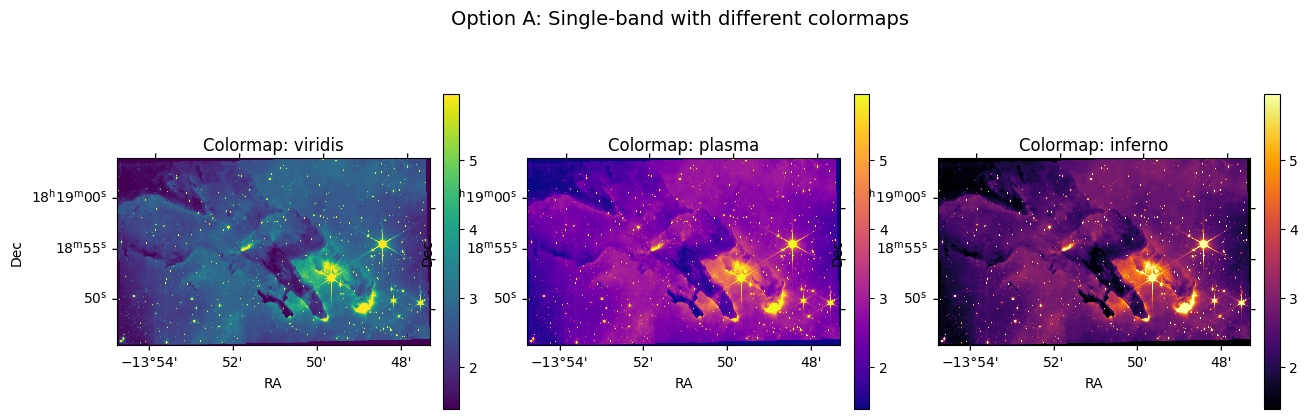

/usr/local/lib/python3.11/dist-packages/astropy/visualization/lupton_rgb.py:452: RuntimeWarning: invalid value encountered in arcsinh
  np.arcsinh(values, out=values)
/usr/local/lib/python3.11/dist-packages/astropy/visualization/lupton_rgb.py:645: RuntimeWarning: invalid value encountered in less_equal
  fInorm = np.where(Int <= 0, 0, np.true_divide(fI, Int))
/usr/local/lib/python3.11/dist-packages/astropy/visualization/basic_rgb.py:153: RuntimeWarning: invalid value encountered in cast
  return image_rgb.astype(output_dtype)


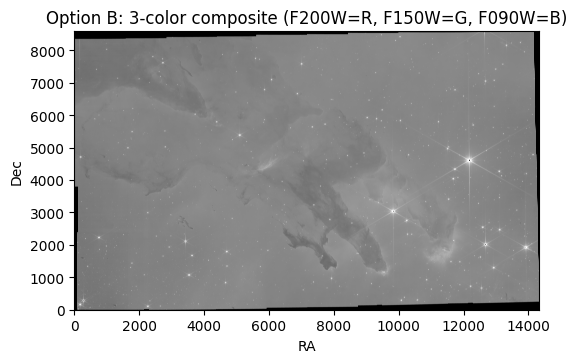

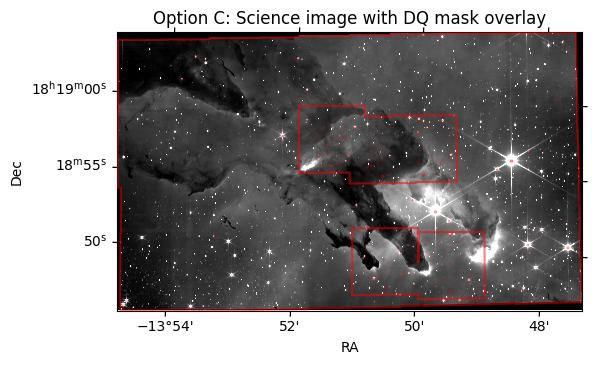

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# -----------------------------
# 1. Load the FITS file safely
# -----------------------------
filename = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"

with fits.open(filename) as hdul:
    hdul.info()  # Print HDU structure for inspection
    # Use the SCI extension (JWST mosaics store science data here)
    d_ = hdul["SCI"].data
    header = hdul["SCI"].header
    wcs = WCS(header)

# Clean up NaNs for plotting
d_clean = np.nan_to_num(d_, nan=0.0)

# -----------------------------
# 2. Option A: Different single colormaps
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': wcs})

cmaps = ["viridis", "plasma", "inferno"]
for ax, cmap in zip(axes, cmaps):
    im = ax.imshow(d_clean, origin="lower", cmap=cmap,
                   vmin=np.nanpercentile(d_, 1),
                   vmax=np.nanpercentile(d_, 99))
    ax.set_title(f"Colormap: {cmap}")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle("Option A: Single-band with different colormaps", fontsize=14)
plt.show()


# -----------------------------
# 3. Option B: Three-color composite (RGB)
# -----------------------------
# IMPORTANT: Replace these with the actual filenames for each filter
f200w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"
f150w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"
f090w = "/kaggle/working/MAST_2025-10-24T0538/JWST/jw02739-o001_t001_nircam_clear-f090w/jw02739-o001_t001_nircam_clear-f090w_i2d.fits"

# Load each filter's SCI extension
r = fits.getdata(f200w, ext=1)  # Red channel
g = fits.getdata(f150w, ext=1)  # Green channel
b = fits.getdata(f090w, ext=1)  # Blue channel

# Create an RGB composite using Lupton scaling
rgb = make_lupton_rgb(r, g, b, stretch=0.5, Q=10)

plt.figure(figsize=(6, 6))
plt.imshow(rgb, origin="lower")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("Option B: 3-color composite (F200W=R, F150W=G, F090W=B)")
plt.show()


# -----------------------------
# 4. Option C: Overlay masks or contours
# -----------------------------
# Load the DQ (data quality) mask
dq = fits.getdata(filename, ext=3)

# Ensure it's 2D (squeeze out extra dimension if needed)
if dq.ndim == 3:
    if dq.shape[0] == 1:
        dq2d = dq[0]  # single plane
    else:
        dq2d = np.bitwise_or.reduce(dq, axis=0)  # combine multiple planes
else:
    dq2d = dq

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(d_clean, origin="lower", cmap="gray",
          vmin=np.nanpercentile(d_, 1),
          vmax=np.nanpercentile(d_, 99))
# Overlay contours where DQ != 0 (flagged pixels)
ax.contour(dq2d, levels=[0.5], colors="red", alpha=0.5)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title("Option C: Science image with DQ mask overlay")
plt.show()


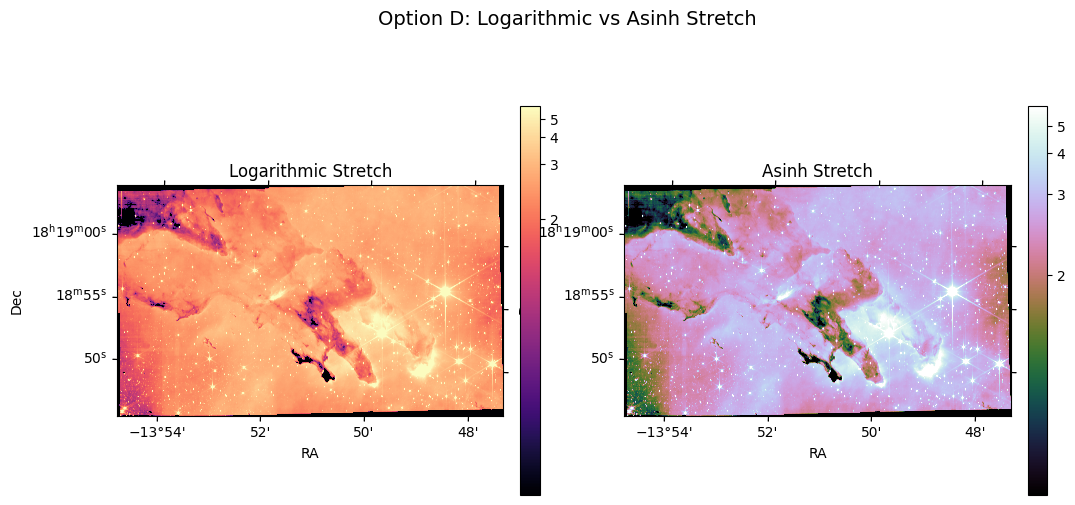

In [33]:
# -----------------------------
# 5. Option D: Logarithmic and Asinh stretches
# -----------------------------
from astropy.visualization import (ImageNormalize, LogStretch, AsinhStretch)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': wcs})

# Logarithmic stretch
norm_log = ImageNormalize(d_clean, vmin=np.nanpercentile(d_, 1),
                          vmax=np.nanpercentile(d_, 99),
                          stretch=LogStretch())
im1 = axes[0].imshow(d_clean, origin="lower", cmap="magma", norm=norm_log)
axes[0].set_title("Logarithmic Stretch")
axes[0].set_xlabel("RA")
axes[0].set_ylabel("Dec")
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Asinh stretch (good for faint + bright features together)
norm_asinh = ImageNormalize(d_clean, vmin=np.nanpercentile(d_, 1),
                            vmax=np.nanpercentile(d_, 99),
                            stretch=AsinhStretch(a=0.02))
im2 = axes[1].imshow(d_clean, origin="lower", cmap="cubehelix", norm=norm_asinh)
axes[1].set_title("Asinh Stretch")
axes[1].set_xlabel("RA")
axes[1].set_ylabel("Dec")
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.suptitle("Option D: Logarithmic vs Asinh Stretch", fontsize=14)
plt.show()


In [34]:
# -----------------------------
# 6. Option E: Interactive sliders for stretch and colormap
# -----------------------------
import ipywidgets as widgets
from ipywidgets import interact
from astropy.visualization import (ImageNormalize, LogStretch, AsinhStretch, LinearStretch)

# Define available colormaps and stretches
cmaps = ["gray", "viridis", "plasma", "inferno", "magma", "cividis", "cubehelix"]
stretches = {
    "Linear": LinearStretch(),
    "Logarithmic": LogStretch(),
    "Asinh": AsinhStretch(a=0.02)
}

def show_image(cmap="viridis", stretch="Linear", vmin=1, vmax=99):
    """
    Interactive display of the FITS image with adjustable colormap and stretch.
    
    Parameters
    ----------
    cmap : str
        Matplotlib colormap name.
    stretch : str
        Stretch type: Linear, Logarithmic, Asinh.
    vmin, vmax : int
        Percentiles for scaling (1–100).
    """
    norm = ImageNormalize(d_clean,
                          vmin=np.nanpercentile(d_, vmin),
                          vmax=np.nanpercentile(d_, vmax),
                          stretch=stretches[stretch])
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection=wcs)
    im = ax.imshow(d_clean, origin="lower", cmap=cmap, norm=norm)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_title(f"Interactive: {stretch} stretch, cmap={cmap}")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.show()

# Create interactive widget
interact(show_image,
         cmap=widgets.Dropdown(options=cmaps, value="viridis"),
         stretch=widgets.Dropdown(options=list(stretches.keys()), value="Linear"),
         vmin=widgets.IntSlider(min=0, max=50, step=1, value=1),
         vmax=widgets.IntSlider(min=50, max=100, step=1, value=99))


interactive(children=(Dropdown(description='cmap', index=1, options=('gray', 'viridis', 'plasma', 'inferno', '…

<function __main__.show_image(cmap='viridis', stretch='Linear', vmin=1, vmax=99)>